In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


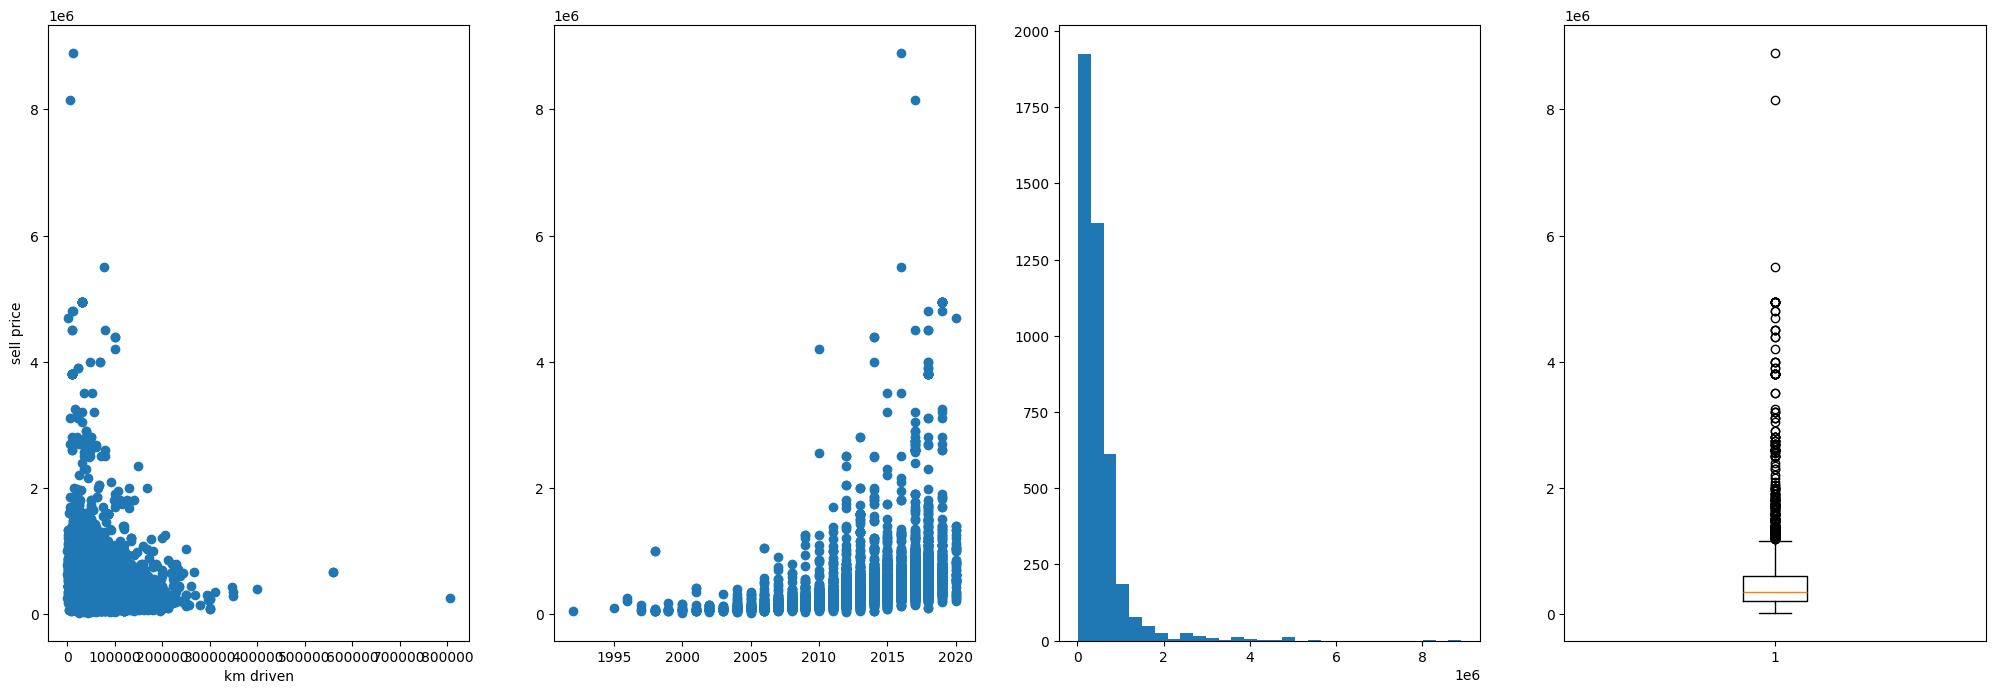

In [4]:
plt.figure(figsize=(25,8))
plt.subplot(1,4,1)
plt.scatter(x=df["km_driven"], y=df["selling_price"])
plt.xlabel("km driven")
plt.ylabel("sell price")
plt.subplot(1,4,2)
plt.scatter(x=df["year"], y=df["selling_price"])
plt.subplot(1,4,3)
plt.hist(x=df["selling_price"], bins=30)
plt.subplot(1,4,4)
plt.boxplot(x=df["selling_price"])
plt.show()

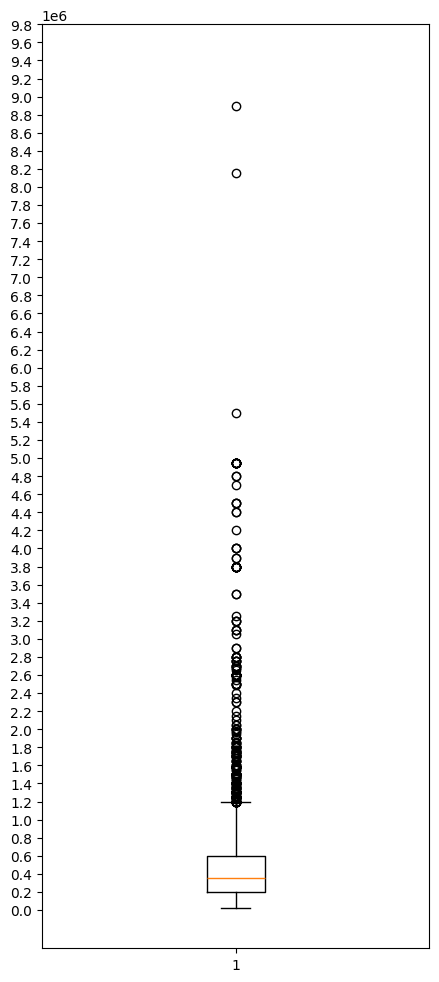

In [20]:
plt.figure(figsize=(5, 12))
plt.boxplot(x=df["selling_price"])
plt.yticks(np.arange(0,10000000,200000))
plt.show()

In [6]:
seller_type_mean = df.groupby("seller_type")["selling_price"].mean()
seller_type_median = df.groupby("seller_type")["selling_price"].median()
print(f"mean: {seller_type_mean}")
print(f"median: {seller_type_median}")

mean: seller_type
Dealer              721822.890342
Individual          424505.419236
Trustmark Dealer    914950.980392
Name: selling_price, dtype: float64
median: seller_type
Dealer              495000.0
Individual          300000.0
Trustmark Dealer    750000.0
Name: selling_price, dtype: float64


In [7]:
df = pd.get_dummies(df, columns=["seller_type"], dtype="int")

In [8]:
df["owner"].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [9]:
df = df[df["owner"] != "Test Drive Car"]
df = pd.get_dummies(df, columns=["owner", "transmission", "fuel"], dtype="int")

In [10]:
df["premium"] = (df["selling_price"] > 1200000).astype(int)
df

,name,year,selling_price,km_driven,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,premium
0,Maruti 800 AC,2007,60000,70000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4337,Maruti 800 AC BSIII,2009,110000,83000,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [11]:
df.drop(columns=["name"]).corr()

,year,selling_price,km_driven,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,transmission_Automatic,transmission_Manual,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,premium
year,1.000000,0.411817,-0.414987,0.133954,-0.165100,0.101637,0.450899,-0.186411,-0.290389,-0.243836,0.145810,-0.145810,0.009416,0.123442,-0.025568,-0.051067,-0.117064,0.182196
selling_price,0.411817,1.000000,-0.189161,0.201140,-0.233251,0.110826,0.229282,-0.078426,-0.160551,-0.110673,0.531838,-0.531838,-0.037602,0.283885,-0.005056,-0.042276,-0.270440,0.755095
km_driven,-0.414987,-0.189161,1.000000,-0.148369,0.175298,-0.090994,-0.309132,0.096973,0.192952,0.193989,-0.121710,0.121710,0.001608,0.285920,-0.001457,0.036398,-0.291545,-0.106821
seller_type_Dealer,0.133954,0.201140,-0.148369,1.000000,-0.936945,-0.084000,0.237328,-0.066511,-0.162194,-0.129147,0.208854,-0.208854,-0.000231,0.040932,0.028150,-0.031917,-0.037109,0.153040
seller_type_Individual,-0.165100,-0.233251,0.175298,-0.936945,1.000000,-0.269539,-0.264416,0.071811,0.183812,0.139802,-0.216677,0.216677,0.005492,-0.036741,-0.026375,0.034832,0.031431,-0.164674
seller_type_Trustmark Dealer,0.101637,0.110826,-0.090994,-0.084000,-0.269539,1.000000,0.099969,-0.021481,-0.077176,-0.042753,0.042311,-0.042311,-0.015023,-0.008030,-0.002365,-0.011369,0.012635,0.047832
owner_First Owner,0.450899,0.229282,-0.309132,0.237328,-0.264416,0.099969,1.000000,-0.190443,-0.808090,-0.379040,0.089776,-0.089776,-0.026451,-0.001797,-0.020964,-0.033898,0.012434,0.122636
owner_Fourth & Above Owner,-0.186411,-0.078426,0.096973,-0.066511,0.071811,-0.021481,-0.190443,1.000000,-0.081023,-0.038004,-0.035721,0.035721,0.040099,-0.021187,-0.002102,0.013345,0.011633,-0.033797
owner_Second Owner,-0.290389,-0.160551,0.192952,-0.162194,0.183812,-0.077176,-0.808090,-0.081023,1.000000,-0.161261,-0.068533,0.068533,0.020855,0.003144,0.025942,0.029993,-0.012294,-0.092867
owner_Third Owner,-0.243836,-0.110673,0.193989,-0.129147,0.139802,-0.042753,-0.379040,-0.038004,-0.161261,1.000000,-0.031002,0.031002,-0.007681,0.009210,-0.004183,0.004758,-0.008306,-0.051585


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [13]:
X= df[["year", "seller_type_Dealer", "seller_type_Trustmark Dealer", "owner_First Owner", "transmission_Automatic", "fuel_Diesel", "premium"]]
y= df[["selling_price"]]

In [14]:
X_scaler = StandardScaler()
scaler_X = X_scaler.fit_transform(X)
y_scaler = StandardScaler()
scaler_y = y_scaler.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
pred = model.predict(X_test)

In [18]:
R2 = r2_score(y_test, pred)
RMSE = root_mean_squared_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
print(f"R2: {R2}")
print(f"RMSE: {RMSE}")
print(f"MSE: {MSE}")

R2: 0.6604425772099702
RMSE: 336775.2505122554
MSE: 113417569357.5924


In [19]:
train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
print(train, test)

0.6969558620510261 0.6604425772099702
